# Santander Customer Transaction Prediction

https://www.kaggle.com/c/santander-customer-transaction-prediction

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

## Import the base libraries required for this modeling

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Load the training data

In [ ]:
txns = pd.read_csv('./train.csv')
txns.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


## Explore the training data

In [ ]:
# Info about the training data
txns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
# Describe the training data
txns.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [ ]:
# Check if there any null values that we have to deal with
txns.isnull().values.any()
# There are no null values in this dataset

False

In [ ]:
# Are there any correlations in the training data with regards to the feature columns var_*?
txns_features = txns.drop(columns=['ID_code','target'])
txns_features.corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,-0.001932,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,-0.000826,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,0.000049,0.004549,0.001194,-0.000918,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,-0.000868,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,0.000052,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,0.003701,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,0.002343,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


<AxesSubplot:>

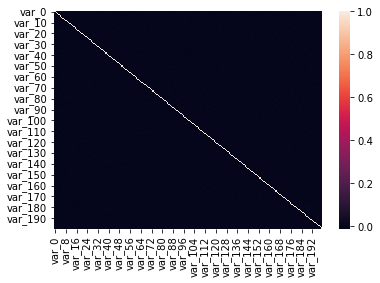

In [ ]:
# Seaborn heatmap showing the correlation
sns.heatmap(txns_features.corr())

[]

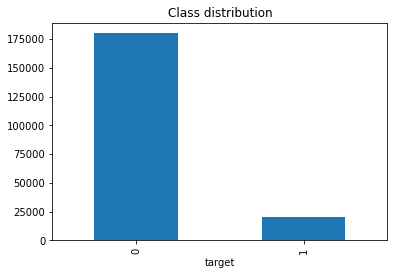

In [ ]:
# Table below shows that we have a high class imbalance between the binary classification
txns.pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution').plot()

## Split the data into training and test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Split the data into training and test set with a ration of 0.7:0.3 and constant random
X_train, X_test, y_train, y_test = train_test_split(txns_features, txns['target'], test_size=0.3, random_state=11, stratify=txns['target'])

In [ ]:
# Preprocessing - Scaled
scaler_train = MinMaxScaler().fit(X_train)
X_train_scaled = scaler_train.transform(X_train)
scaler_test = MinMaxScaler().fit(X_test)
X_test_scaled = scaler_test.transform(X_test)

## Hyperparameter tuning using Grid Search Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# GridSearchCV
lr = LogisticRegression()
params = {'solver':['lbfgs', 'saga'], 'C': [0.01, 0.1, 1, 10]}
gs_cv = GridSearchCV(estimator=lr, param_grid=params, cv=5)
# Fit the pipeline
gs_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs', 'saga']})

In [ ]:
gs_cv.best_params_

{'C': 1, 'solver': 'saga'}

In [ ]:
# LogisticRegression
lr_tuned = gs_cv.best_estimator_
# Fit the model
lr_tuned.fit(X_train_scaled, y_train)

LogisticRegression(C=1, solver='saga')

## Evaluate the Model

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


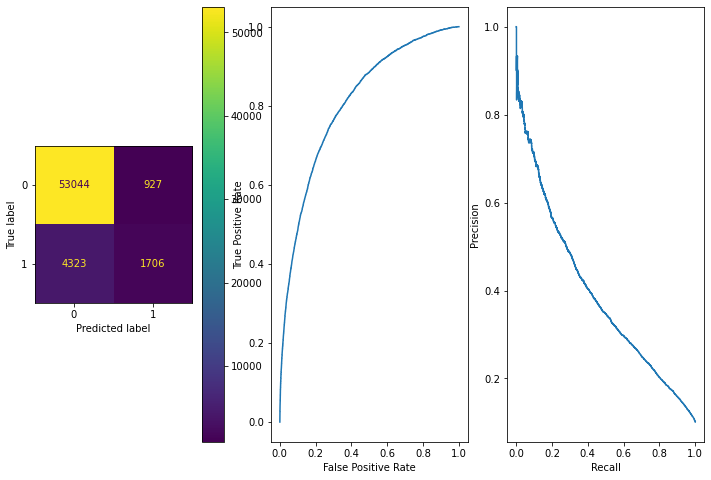

In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Confusion Matrix
y_pred = lr_tuned.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# ROC Curve
y_score = lr_tuned.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr_tuned.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Precision-Recall Curve
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=lr_tuned.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()

In [ ]:
y_pred = lr_tuned.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))
print("Recall: ", recall_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))
print("F1-Score: ", f1_score(y_test, y_pred, pos_label=lr_tuned.classes_[1]))

Accuracy:  0.9125
Precision:  0.6479301177364223
Recall:  0.2829656659479184
F1-Score:  0.3939044100669591


#### Accuracy is pretty high but from previous observation, we know that the data imbalance could be a prime reason driving this. Looking at the Precision/Recall/F1-score tells us the story that the model is sub-optimal and Accuracy is the wrong metric to look at in this scenario.

### Upsampling

[]

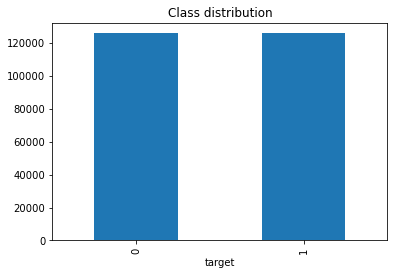

In [ ]:
from sklearn.utils import resample

temp_df = pd.concat([X_train, y_train], axis=1)

buy = temp_df[temp_df['target'] == 1]
not_buy = temp_df[temp_df['target'] == 0]

# Upsample to have equal number of customer buy and not_buy features
buy_upsampled = resample(buy, replace=True, n_samples=len(not_buy), random_state=11)

upsampled = pd.concat([not_buy, buy_upsampled])

# Check the class distribution
upsampled.pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution').plot()

In [ ]:
# Create the feature and target dataframes including appropriate scaling
X_train_upsampled = upsampled.drop(['target'], axis=1)
y_train_upsampled = upsampled['target']

scaler_train_upsampled = MinMaxScaler().fit(X_train_upsampled)
X_train_upsampled_scaled = scaler_train_upsampled.transform(X_train_upsampled)

### Re-train the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV
lr_upsampled = LogisticRegression()
params = {'solver':['lbfgs', 'saga'], 'C': [0.01, 0.1, 1, 10]}
gs_cv_upsampled = GridSearchCV(estimator=lr_upsampled, param_grid=params, cv=5)
# Fit the pipeline
gs_cv_upsampled.fit(X_train_upsampled_scaled, y_train_upsampled)

gs_cv_upsampled.best_params_

# LogisticRegression
lr_tuned_upsampled = gs_cv_upsampled.best_estimator_
# Fit the model
lr_tuned_upsampled.fit(X_train_upsampled_scaled, y_train_upsampled)

LogisticRegression(C=10)

### Re-Evaluate the Model

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


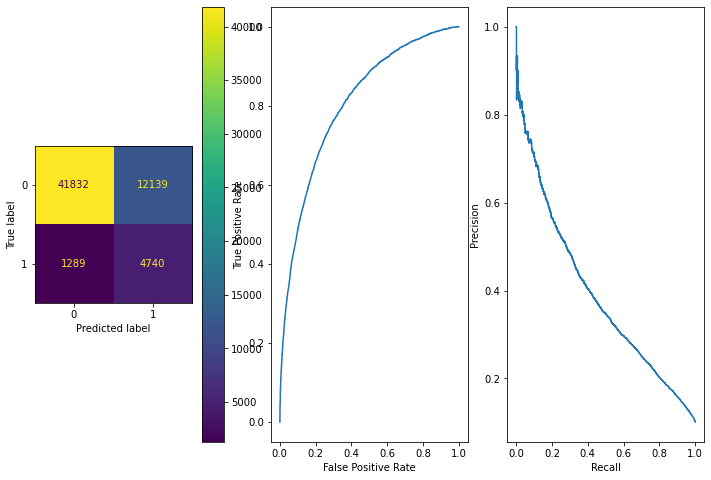

In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Confusion Matrix
y_pred_upsampled = lr_tuned_upsampled.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_upsampled)
cm_display = ConfusionMatrixDisplay(cm)

# ROC Curve
y_score_upsampled = lr_tuned_upsampled.decision_function(X_test)

fpr_upsampled, tpr_upsampled, _ = roc_curve(y_test, y_score_upsampled, pos_label=lr_tuned_upsampled.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr_upsampled, tpr=tpr_upsampled)

# Precision-Recall Curve
prec_upsampled, recall_upsampled, _ = precision_recall_curve(y_test, y_score_upsampled, pos_label=lr_tuned_upsampled.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()

In [ ]:
y_pred = lr_tuned_upsampled.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, pos_label=lr_tuned_upsampled.classes_[1]))
print("Recall: ", recall_score(y_test, y_pred, pos_label=lr_tuned_upsampled.classes_[1]))
print("F1-Score: ", f1_score(y_test, y_pred, pos_label=lr_tuned_upsampled.classes_[1]))

Accuracy:  0.7762
Precision:  0.2808223235973695
Recall:  0.7862000331729971
F1-Score:  0.4138292299633316


#### Metric before upsampling:

- Accuracy:  0.9125
- Precision:  0.6479301177364223
- Recall:  0.2829656659479184
- F1-Score:  0.3939044100669591

#### Metric after upsampling: 

- Accuracy:  0.7762
- Precision:  0.2808223235973695
- Recall:  0.7862000331729971
- F1-Score:  0.4138292299633316

#### Conclusion
Upsampling did help with increasing the Recall but at the expense of Precision. There was a minimal bump
in F1-Score which resulted in Precision and Recall moving substantially in the opposite direction.

### Downsampling

[]

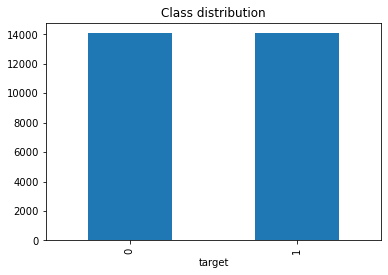

In [ ]:
from sklearn.utils import resample

temp_df = pd.concat([X_train, y_train], axis=1)

buy = temp_df[temp_df['target'] == 1]
not_buy = temp_df[temp_df['target'] == 0]

# Upsample to have equal number of customer buy and not_buy features
not_buy_downsampled = resample(not_buy, replace=False, n_samples=len(buy), random_state=11)

downsampled = pd.concat([buy, not_buy_downsampled])

# Check the class distribution
downsampled.pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution').plot()

In [ ]:
# Create the feature and target dataframes including appropriate scaling
X_train_downsampled = downsampled.drop(['target'], axis=1)
y_train_downsampled = downsampled['target']

scaler_train_downsampled = MinMaxScaler().fit(X_train_downsampled)
X_train_downsampled_scaled = scaler_train_downsampled.transform(X_train_downsampled)

### Re-train the Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV
lr_downsampled = LogisticRegression()
params = {'solver':['lbfgs', 'saga'], 'C': [0.01, 0.1, 1, 10]}
gs_cv_downsampled = GridSearchCV(estimator=lr_downsampled, param_grid=params, cv=5)
# Fit the pipeline
gs_cv_downsampled.fit(X_train_downsampled_scaled, y_train_downsampled)

gs_cv_downsampled.best_params_

# LogisticRegression
lr_tuned_downsampled = gs_cv_downsampled.best_estimator_
# Fit the model
lr_tuned_downsampled.fit(X_train_downsampled_scaled, y_train_downsampled)

LogisticRegression(C=0.01, solver='saga')

### Re-Evaluate the Model

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


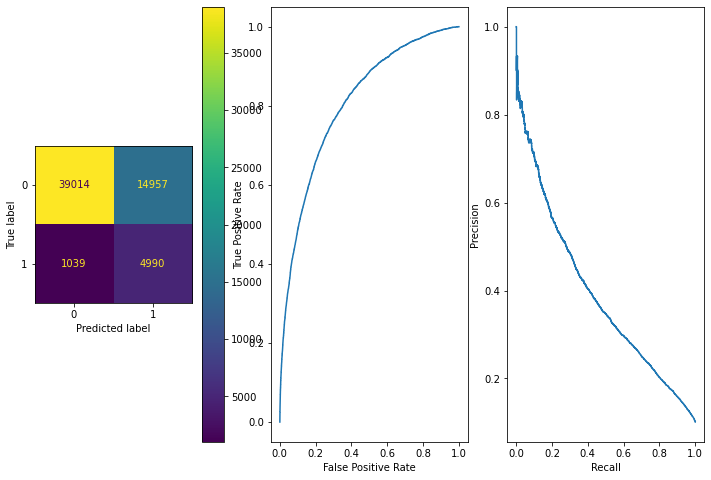

In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Confusion Matrix
y_pred_downsampled = lr_tuned_downsampled.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_downsampled)
cm_display = ConfusionMatrixDisplay(cm)

# ROC Curve
y_score_downsampled = lr_tuned_downsampled.decision_function(X_test)

fpr_downsampled, tpr_downsampled, _ = roc_curve(y_test, y_score_downsampled, pos_label=lr_tuned_downsampled.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr_upsampled, tpr=tpr_upsampled)

# Precision-Recall Curve
prec_downsampled, recall_downsampled, _ = precision_recall_curve(y_test, y_score_downsampled, pos_label=lr_tuned_downsampled.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()

In [ ]:
y_pred_downsampled = lr_tuned_downsampled.predict(X_test_scaled)
print("Accuracy: ", accuracy_score(y_test, y_pred_downsampled))
print("Precision: ", precision_score(y_test, y_pred_downsampled, pos_label=lr_tuned_downsampled.classes_[1]))
print("Recall: ", recall_score(y_test, y_pred_downsampled, pos_label=lr_tuned_downsampled.classes_[1]))
print("F1-Score: ", f1_score(y_test, y_pred_downsampled, pos_label=lr_tuned_downsampled.classes_[1]))

Accuracy:  0.7334
Precision:  0.25016293176918836
Recall:  0.8276662796483663
F1-Score:  0.38420080073914387


#### Metric before downsampling:

- Accuracy:  0.9125
- Precision:  0.6479301177364223
- Recall:  0.2829656659479184
- F1-Score:  0.3939044100669591

#### Metric after downsampling: 

- Accuracy:  0.7334
- Precision:  0.25016293176918836
- Recall:  0.8276662796483663
- F1-Score:  0.38420080073914387

#### Conclusion
Downsampling did worst that Upsampling purely on basis of the F1-Score. The Recall improved but both the Precision and Accuracy 
went down further. Sticking with Upsampling makes sense for LogisticRegression.

## Best metric achieved with LogisticRegression with MinMaxScaling and Upsampling:

### Accuracy: 0.7762
### Precision: 0.2808223235973695
### Recall: 0.7862000331729971
### F1-Score: 0.4138292299633316